<a href="https://colab.research.google.com/github/Madhurika1292/Medicines-and-Common-Treatment-Recommendation-System/blob/main/Medicine_Recommendation_System_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medicine Recommendation System


## COLLABORATIVE FILTERING


### INTRODUCTION
•	Collaborative filtering filters information by using the interactions and data collected by the system from other users. It is based on the idea that individuals who have agreed on certain items in their assessment are likely to agree again in the future.

•	The so-called similarity index-based approach is applied by most collaborative filtering systems. In the neighborhood-based method, based on their similarities to the active user, multiple users are chosen. Active user inference is made by measuring the weighted average of the selected user ratings.

•	The relationship between users and objects is the subject of collaborative-filtering systems. The similarity of the items is determined by the similarity between the users who have rated all items and the ratings of those items.

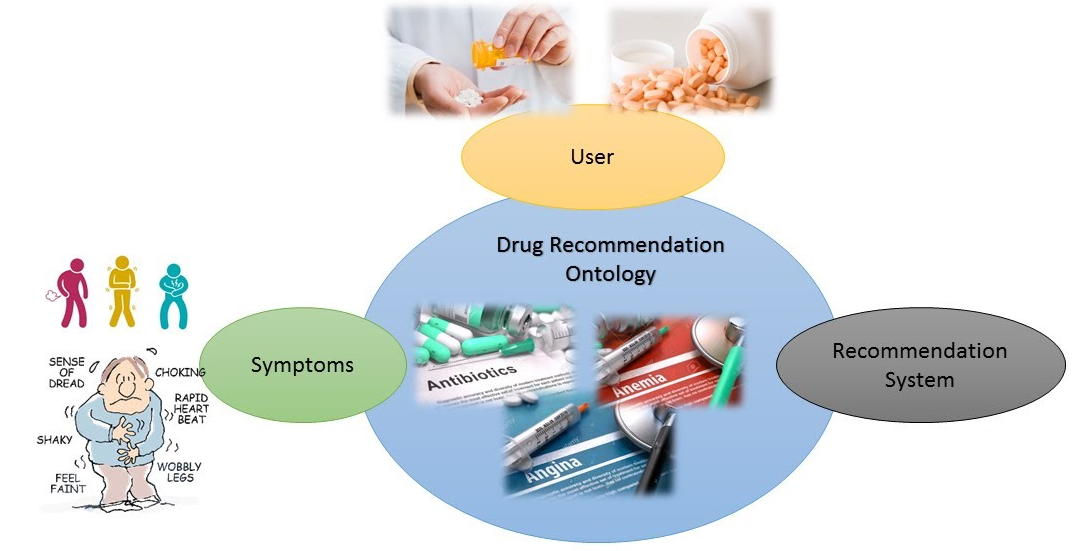



There are two classes of Collaborative Filtering:

• **User-based**, which measures the similarity between target users and other users.

•	**Item-based**, which measures the similarity between the items that target users’ rate or interact with and other items.




### Types of collaborative filtering –
The CF techniques are broadly divided into 2-types:

•	Memory Based approach.

•	Model Based approach.

Here, we will be focusing on different model based approaches.

## **Model Based Approach-**

In this method, CF models are built to predict the medicine/drug using machine learning algorithms. The algorithms in this method can further be broken down into 3 sub-types-

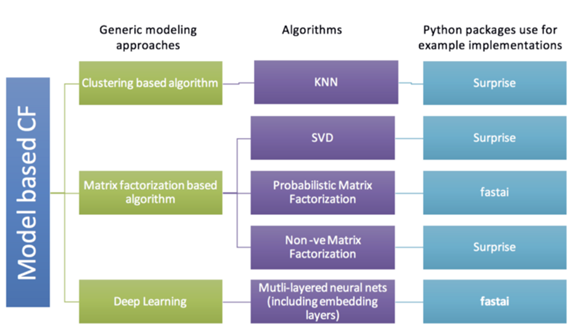


### 1. **Clustering based algorithm** - 

Clustering is essentially grouping the set of instances in a way that those within the same group (cluster) are like each other than to those in the other clusters. A cluster therefore is defined as a collection of samples which are similar between them and are dissimilar to the samples belonging to other clusters.

Clustering is a process to group a set of objects in such a way that objects in the same clusters are more like each other than to those in other clusters.

K-Mean Clustering - 

To obtain the best optimized performance, K-Means Clustering is implemented along with K-Nearest Neighbor on the movielens dataset. The data is distributed in the current technique, resulting in many clusters, while data is collected in the proposed technique and results in a low number of clusters. In the proposed scheme, the method of recommending a film is streamlined. The suggested recommendation framework predicts the user's preference for a film based on various criteria. The recommendation method operates on the notion that individuals have a shared desire or option. Such users can affect each other's views. This approach optimizes the mechanism and has lower RMSE values.

Below is the implementation of Movie Recommendation System using clustering approach where we made an attempt to cluster movies into 2 genres based on ratings from users.

#### Data Loading

In [1]:
#Loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, make_scorer

In [2]:
# Importing dataset from drive
from google.colab import drive
drive.mount('/content/gdrive/')

import sys
sys.path.append('/content/gdrive/My Drive/Drugscom')

Mounted at /content/gdrive/


In [3]:
!ls gdrive/MyDrive/Drugscom/

Drugscom_test.csv     Drugscom_train.csv
drugsComTest_raw.csv  drugsComTrain_raw.csv


In [4]:
#Loading data
Drugscom_train=pd.read_csv('/content/gdrive/My Drive/Drugscom/Drugscom_train.csv')
Drugscom_test=pd.read_csv('/content/gdrive/My Drive/Drugscom/Drugscom_test.csv')

It appears there are some nan value available in the dataset after reloading from the google drive so clearing the nan values and removing the Unamed column

In [5]:
#Before
# checking for null values
Drugscom_train.isnull().sum()

Unnamed: 0      0
uniqueId        0
drugName        0
condition       0
review          0
rating          0
date            0
usefulCount     0
treatments      0
clean_review    6
dtype: int64

In [6]:
# checking for null values
Drugscom_test.isnull().sum()

Unnamed: 0      0
uniqueId        0
drugName        0
condition       0
review          0
rating          0
date            0
usefulCount     0
treatments      0
clean_review    2
dtype: int64

In [7]:
# Dropping null values
Drugscom_train = Drugscom_train.dropna(axis=0)
Drugscom_test = Drugscom_test.dropna(axis=0)

In [8]:
# checking for null values
Drugscom_train.isnull().sum()

Unnamed: 0      0
uniqueId        0
drugName        0
condition       0
review          0
rating          0
date            0
usefulCount     0
treatments      0
clean_review    0
dtype: int64

In [9]:
# checking for null values
Drugscom_test.isnull().sum()

Unnamed: 0      0
uniqueId        0
drugName        0
condition       0
review          0
rating          0
date            0
usefulCount     0
treatments      0
clean_review    0
dtype: int64

Removing unamed column

In [10]:
#Changing the "Unnamed: 0" column to uniqueId as it represents the unique id of the drugs
Drugscom_train=Drugscom_train.drop('Unnamed: 0', axis='columns')
Drugscom_test=Drugscom_test.drop('Unnamed: 0', axis='columns')

Creating a sentiment column to check if reviews and rating provided are positive or negative.

for that we will first remove the rating that have 4-7 start reviews

In [11]:
Drugscom_train=Drugscom_train.drop(Drugscom_train[(Drugscom_train['rating'] > 4.0) & (Drugscom_train['rating'] < 6.0)].index)
Drugscom_test=Drugscom_test.drop(Drugscom_test[(Drugscom_test['rating'] > 4.0) & (Drugscom_test['rating'] < 6.0)].index)

Now setting the sentiment of reviews that have rating 8-10 as positive (1) else negative(0)

In [12]:
Drugscom_train['sentiment'] = np.where(Drugscom_train['rating'] >= 7, '1', '0')
Drugscom_test['sentiment'] = np.where(Drugscom_test['rating'] >= 7, '1', '0')

In [13]:
Drugscom_train.head()

,uniqueId,drugName,condition,review,rating,date,usefulCount,treatments,clean_review,sentiment
0,131173,A / B Otic,Otitis Media,"""It numbs the pain. It makes my ear feel heavi...",10,2009-09-23,20,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub...",numb pain make ear feel heavier least throb su...,1
1,153899,Amoxicillin,Otitis Media,"""Perforation in my right tympanic membrane (ea...",8,2011-04-12,16,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub...",perfor right tympan membran eardrum linger upp...,1
2,153715,Amoxicillin,Otitis Media,"""This medication did not clear up the infectio...",2,2017-05-31,0,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub...",medic not clear infect well notic odorless dis...,0
3,153780,Amoxicillin,Otitis Media,"""My son who was 7 months old at the time was p...",1,2016-12-09,0,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub...",son month old time prescrib amoxicillin ear in...,0
4,153838,Amoxicillin,Otitis Media,"""This medication works amazingly for ear infec...",9,2013-10-02,12,"ANALGESICS,ANTIBIOTIC THERAPY,Tympanostomy Tub...",medic work amaz ear infect ear infect count li...,1


Checking for the count of positive and negative reviews in training dataset. For our recommendation system we will require more positive reviews than negative

In [14]:
Drugscom_train.sentiment.value_counts(normalize=True)

1    0.696646
0    0.303354
Name: sentiment, dtype: float64

Splitting the dataset

In [15]:
X_train=Drugscom_train.clean_review
y_train=Drugscom_train.sentiment
X_test=Drugscom_test.clean_review
y_test=Drugscom_test.sentiment


In [16]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


stop_words = set(stopwords.words('english'))
remove_stopwords = ["isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't","aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't"]
for i in remove_stopwords:
    stop_words.remove(i)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words=stop_words, ngram_range=(1, 1), min_df=10, max_df=0.7)

X_train_cv = cv.fit_transform(X_train)
X_test_cv  = cv.transform(X_test)

pd.DataFrame(X_train_cv.toarray(), columns=cv.get_feature_names()).head()

,aa,aap,aarp,ab,abacavir,abandon,abat,abcess,abd,abdomen,abdomin,abid,abil,abilifi,abit,abl,ablat,abnorm,abort,abras,abreva,abroad,abrupt,abscess,absenc,absent,absolut,absorb,absorpt,abstain,abstin,absurd,abt,abund,abus,abut,ac,academ,acanya,acceler,...,zelnorm,zepati,zero,zest,zestril,zetia,ziac,ziana,zilch,zinc,zip,zipsor,zit,zithromax,zocor,zofran,zohydro,zoladex,zoloft,zolpidem,zombi,zombifi,zometa,zomig,zone,zonegran,zonisamid,zonk,zopiclon,zovia,zovirax,zpack,zpak,zubsolv,zumba,zyban,zyclara,zyprexa,zyrtec,zyvox
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Logistic regression

In [18]:
lr=LogisticRegression()

In [19]:
lr.fit(X_train_cv, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred_cv = lr.predict(X_test_cv)


In [21]:
def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20});

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]

    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

[0.832, 0.85, 0.921, 0.884]

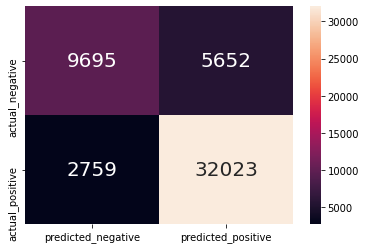

In [22]:
cm_lr=conf_matrix(y_test, y_pred_cv)
cm_lr

## Naive Bayes

In [23]:
# Fit the first Naive Bayes model
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv, y_train)

y_pred_cv_mnb = mnb.predict(X_test_cv)

In [24]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv, y_train)

y_pred_cv_bnb = bnb.predict(X_test_cv)

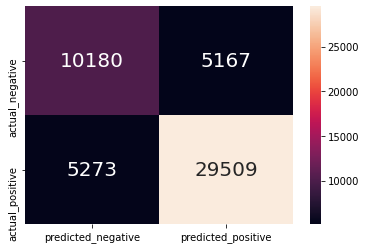

In [25]:
cm_mnb = conf_matrix(y_test, y_pred_cv_mnb)

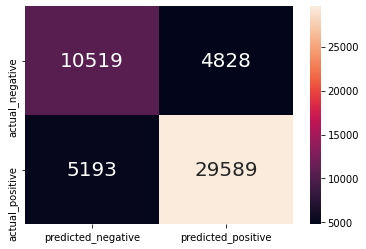

In [26]:
cm_bnb = conf_matrix(y_test, y_pred_cv_bnb)

In [31]:
results_nb_cv = pd.DataFrame(list(zip(cm_mnb, cm_bnb)))
results_nb_cv = results_nb_cv.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb_cv.columns = ['MNB', 'BNB']
results_nb_cv


,MNB,BNB
Accuracy,0.792,0.800
Precision,0.851,0.860
Recall,0.848,0.851
F1 Score,0.849,0.855


### Using TF-TDF instead of count vector

In [32]:
# Create TF-IDF versions of the Count Vectorizers created earlier in the exercise
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words=stop_words, ngram_range=(1, 1), min_df=10, max_df=0.7)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


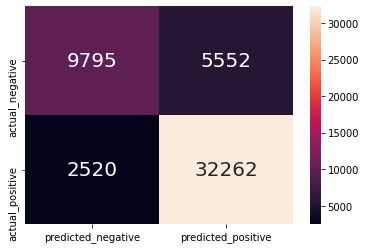

In [33]:
# Fit the  logistic regression on the TF-IDF data
lr.fit(X_train_tfidf, y_train)
y_pred_tfidf_lr = lr.predict(X_test_tfidf)
cm_lr_tfidf = conf_matrix(y_test, y_pred_tfidf_lr)

In [34]:
results_nb_tfidf = pd.DataFrame(list(zip(cm_mnb, cm_bnb)))
results_nb_tfidf = results_nb_tfidf.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb_tfidf.columns = ['MNB', 'BNB']
results_nb_tfidf

,MNB,BNB
Accuracy,0.792,0.800
Precision,0.851,0.860
Recall,0.848,0.851
F1 Score,0.849,0.855


In [ ]:
Print

In [ ]:
# Fit the first Naive Bayes model on the TF-IDF data
mnb.fit(X_train_tfidf.toarray(), y_train)


In [ ]:
y_pred_tfidf_mnb = mnb.predict(X_test_tfidf)
cm_mnb_tfidf = conf_matrix(y_test, y_pred_tfidf_mnb)

In [ ]:
# Fit the second Naive Bayes model on the TF-IDF data
bnb.fit(X_train_tfidf.toarray(), y_train)
y_pred_tfidf2_bnb = bnb.predict(X_test_tfidf)
cm_bnb_tfidf = conf_matrix(y_test, y_pred_tfidf2_bnb)

In [ ]:
Print

In [ ]:
import multiprocessing
from time import time
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk
from tqdm import tqdm

df_all=Drugscom_train
df_all['clean_review']=[i.split() for i in list(df_all['clean_review'])]
NUM_CLUSTERS=3
df_all_cluster=df_all[df_all['condition']== 'Pain']
df_all_cluster_group=df_all_cluster.groupby('drugName')['clean_review'].apply(sum).reset_index(name='clean_review')
df_all_cluster_group

side_effect_list = []
side_effect_list=df_all_cluster_group[df_all_cluster_group.astype(str)['clean_review'] != '[]']['clean_review'].values


In [ ]:
w2v_model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative samplingx`
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

w2v_model.build_vocab(side_effect_list, progress_per=10000)

#w2v_model.train(side_effect_list, total_examples = w2v_model.corpus_count, epochs=10, report_delay=1)
w2v_model.wv.vocab

In [ ]:
import multiprocessing
from time import time
from gensim.models import Word2Vec
from nltk.cluster import KMeansClusterer
import nltk
def w2v_clustering(cond,cluster):
    df_all=Drugscom_train
    #df_all['clean_review']=[i.split() for i in list(df_all['clean_review'])]
    NUM_CLUSTERS=cluster
    df_all_cluster=df_all[df_all['condition']== cond]
    df_all_cluster_group=df_all_cluster.groupby('drugName')['clean_review'].apply(sum).reset_index(name='clean_review')
    side_effect_list=df_all_cluster_group[df_all_cluster_group.astype(str)['clean_review'] != '[]']['clean_review'].values

    cores = multiprocessing.cpu_count()
    w2v_model = Word2Vec(min_count=5,
                         window=4,
                         size=300,
                         sample=6e-5, 
                         alpha=0.03, 
                         min_alpha=0.0007, 
                         negative=20,
                         workers=cores-1)
    t = time()

    w2v_model.build_vocab(side_effect_list, progress_per=10000)

    print('Time to build vocab: {} mins'.format(round((time() - t) / 60, 2)))
    t = time()

    w2v_model.train(side_effect_list, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)

    print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))
    w2v_model.init_sims(replace=True)
#     print(w2v_model.wv.vocab)
    kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
    assigned_clusters = kclusterer.cluster(w2v_model[w2v_model.wv.vocab], assign_clusters=True)
#     print (assigned_clusters)
#     print('As:', assigned_clusters)
#     print('Means:', kclusterer.means())
    vocabulary=[i for i in w2v_model.wv.vocab.keys()]
    data = {'Vocabulary':vocabulary, 'Cluster':assigned_clusters} 
    data_cluster=pd.DataFrame(data)
    df=data_cluster.groupby('Cluster')['Vocabulary'].count()
    index_list=['type'+str(i+1) for i in range(NUM_CLUSTERS)]
    df = pd.DataFrame({'count': df.values},
                            index=index_list)
    df['count'].plot.pie( figsize=(5, 5))
    for i in range(NUM_CLUSTERS):
        print('Cluster'+str(i+1)+':')
        print(data_cluster[data_cluster['Cluster']==i]['Vocabulary'].values.tolist())

In [ ]:
w2v_clustering('Pain',3)


In [ ]:
x`